In [1]:
# 包含库 ######################################################
# 绘制图片需要
from matplotlib import pyplot as plt
import numpy as np
import cv2

import os
import sys
sys.path.append('/usr/local/lib64')
sys.path.append('/home/wilson/faceEmotionCppLinux/lib')

# 引入注册机器
import register as feRegister

In [2]:
# 注册单张图片 ####################################################
def registerImage(pPath):
    try:
        # 获取处理实例
        instance = feRegister.createInstance()
        response = feRegister.register(instance, pPath)
        if response.count < 1:
            print("no any images registered")
        else:
            for k in range(response.count):
                e = response.elems[k]
                faceName = bytes.decode(e.name)
                imagePath = bytes.decode(e.imagePath)
                print("faceName :", faceName)
                print("imagePath:", imagePath)
                print("rect:", e.left, e.top, e.right, e.bottom)
                ptLeftTop = (e.left, e.top)
                ptRightBottom = (e.right, e.bottom)

                img = cv2.imread(imagePath)
                #img2 = img[:,:,::-1] # 必须为 ::-1
                cv2.putText(img, faceName, ptLeftTop, cv2.FONT_HERSHEY_SIMPLEX, 1, (180,100,255),2, cv2.LINE_AA)

                # 绘制一个红色矩形
                point_color = (255, 0, 0) # BGR
                thickness = 1
                lineType = 8
                cv2.rectangle(img, ptLeftTop, ptRightBottom, point_color, thickness, lineType)

                plt.imshow(img)
                plt.show()
    finally:
        feRegister.releaseRegisterResponse(instance, response)
        feRegister.releaseInstance(instance)
        instance = None

faceName : male
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images/male.png
rect: 170 112 471 413


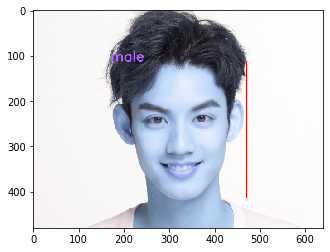

In [3]:
# 注册单张图片
registerImage('/home/wilson/faceEmotionCppLinux/res/register_images/male.png')

faceName : female
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//female.png
rect: 242 94 391 243


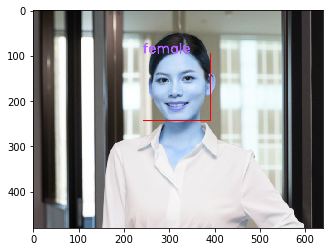

faceName : male
imagePath: /home/wilson/faceEmotionCppLinux/res/register_images//male.png
rect: 170 112 471 413


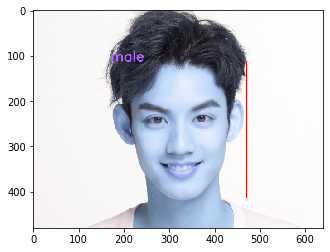

In [4]:
# 注册多张图片
registerImage( '/home/wilson/faceEmotionCppLinux/res/register_images/')